## Task-05
Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/US_Accidents_June20.csv")

<ipython-input-70-ec779df4f28f>:1: DtypeWarning: Columns (32,33,34,35,36,37,38,39,40,41,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/US_Accidents_June20.csv")


In [ ]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57610 entries, 0 to 57609
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     57610 non-null  object 
 1   Source                 57610 non-null  object 
 2   TMC                    57610 non-null  float64
 3   Severity               57610 non-null  int64  
 4   Start_Time             57610 non-null  object 
 5   End_Time               57610 non-null  object 
 6   Start_Lat              57610 non-null  float64
 7   Start_Lng              57610 non-null  float64
 8   End_Lat                0 non-null      float64
 9   End_Lng                0 non-null      float64
 10  Distance(mi)           57610 non-null  float64
 11  Description            57610 non-null  object 
 12  Number                 14502 non-null  float64
 13  Street                 57610 non-null  object 
 14  Side                   57610 non-null  object 
 15  Ci

In [ ]:
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,57610.000000,57610.000000,57610.000000,57610.000000,0.0,0.0,57610.000000,14502.000000,56990.000000,2779.000000,56801.000000,57167.000000,56830.000000,46627.000000,3793.000000
mean,208.599479,2.411352,36.929871,-120.363561,NaN,NaN,0.014024,7192.995656,65.346945,41.200972,61.373321,29.977157,9.306062,8.601596,0.027772
std,17.924673,0.495072,1.883972,4.531607,NaN,NaN,0.332920,8129.793660,13.417514,17.010107,22.183478,0.254855,2.019895,4.464191,0.052301
min,200.000000,1.000000,32.544304,-123.813927,NaN,NaN,0.000000,1.000000,3.900000,-8.400000,4.000000,3.010000,0.100000,0.000000,0.000000
25%,201.000000,2.000000,34.414776,-122.081406,NaN,NaN,0.000000,1597.250000,57.000000,34.050000,45.000000,29.890000,10.000000,5.800000,0.000000
50%,201.000000,2.000000,37.699612,-121.531723,NaN,NaN,0.000000,4298.000000,64.000000,39.500000,63.000000,29.970000,10.000000,8.100000,0.010000
75%,201.000000,3.000000,38.244556,-118.473099,NaN,NaN,0.010000,9698.000000,73.900000,43.100000,78.000000,30.070000,10.000000,11.500000,0.030000
max,406.000000,4.000000,41.428753,-81.550728,NaN,NaN,51.130000,73648.000000,113.000000,107.000000,100.000000,33.040000,80.000000,142.700000,0.550000


In [ ]:
df['Severity'].value_counts()

Severity
2    33796
3    23729
1       67
4       18
Name: count, dtype: int64

In [ ]:
level_of_accedient = df['Severity'].value_counts(normalize=True).reset_index().sort_values(by='proportion')
level_of_accedient

,Severity,proportion
3,4,0.000312
2,1,0.001163
1,3,0.411890
0,2,0.586634


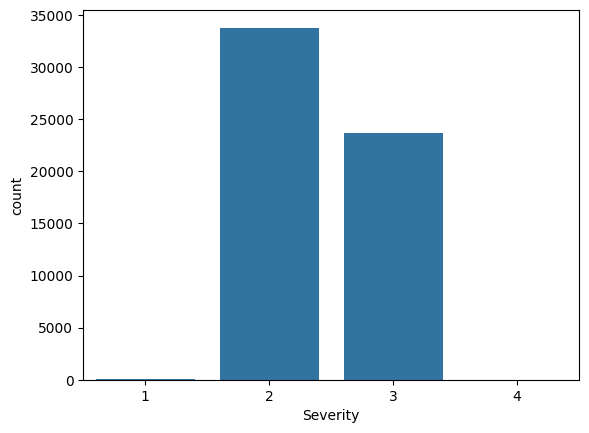

In [ ]:
sns.countplot(data=df, x=df.Severity)
plt.show()

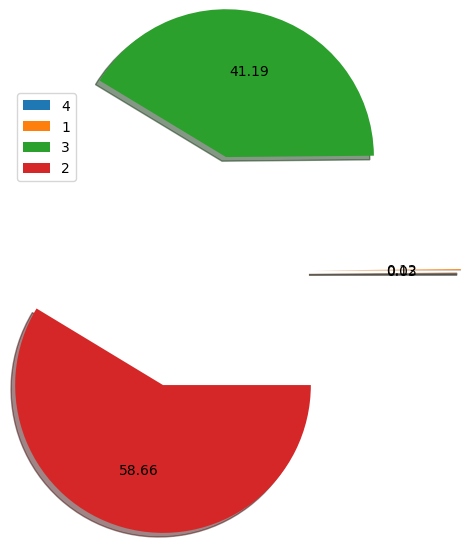

In [ ]:
plt.pie(level_of_accedient.proportion,shadow=True, autopct='%.2f',explode=[0.8,0.8,0.8,0.8] )
plt.legend(level_of_accedient.Severity)
plt.show()

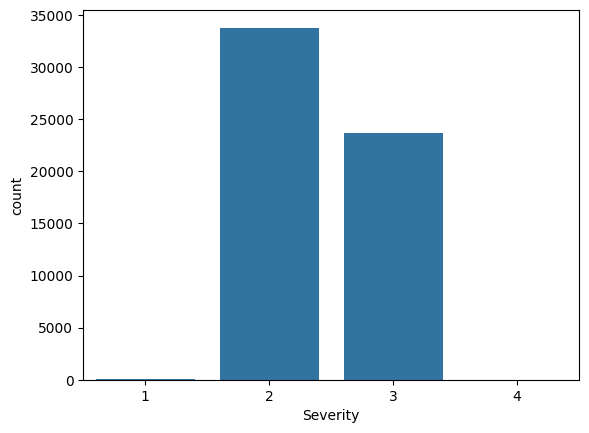

In [ ]:
sns.countplot(x="Severity",data=df)
plt.show()

<ipython-input-79-5e0b70ec5385>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="City",data=df[: 30],palette="Set1")


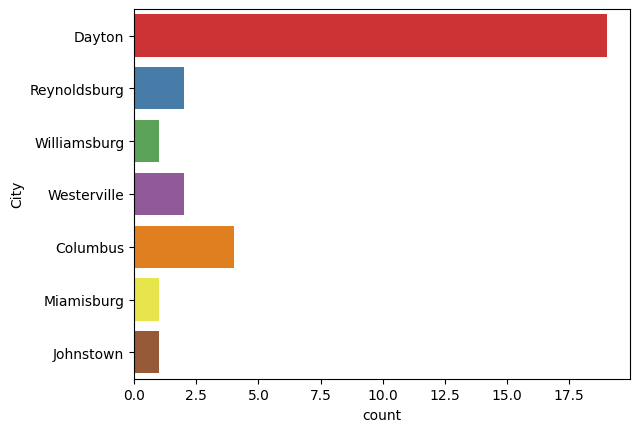

In [ ]:
sns.countplot(y="City",data=df[: 30],palette="Set1")
plt.show()

In [ ]:
cities = df['City'].unique()
len(cities)

758

In [ ]:
accidents_by_cities = df['City'].value_counts()
accidents_by_cities

City
Sacramento         5223
San Jose           3026
Los Angeles        2680
Oakland            1802
San Francisco      1287
                   ... 
Oberlin               1
Delaware              1
Cambridge             1
Fraziers Bottom       1
Mt Baldy              1
Name: count, Length: 757, dtype: int64

In [ ]:
#top 10 cities by number of accident
accidents_by_cities[:10]

City
Sacramento       5223
San Jose         3026
Los Angeles      2680
Oakland          1802
San Francisco    1287
Hayward           934
Stockton          886
San Diego         846
Fremont           770
Tracy             753
Name: count, dtype: int64

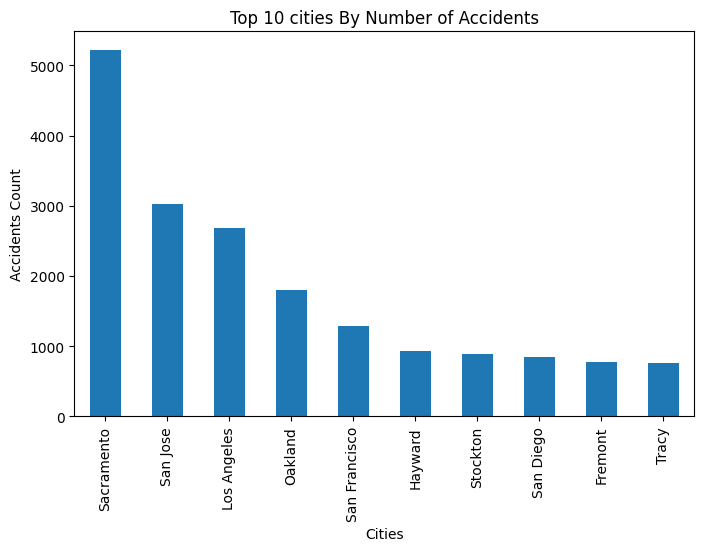

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

<Axes: xlabel='Humidity(%)', ylabel='Count'>

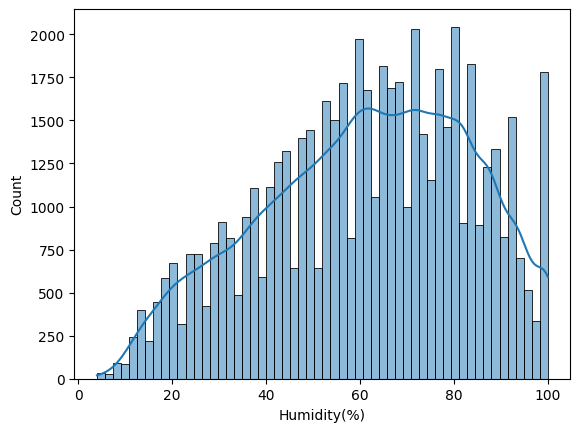

In [ ]:
sns.histplot(data=df["Humidity(%)"], kde=True)


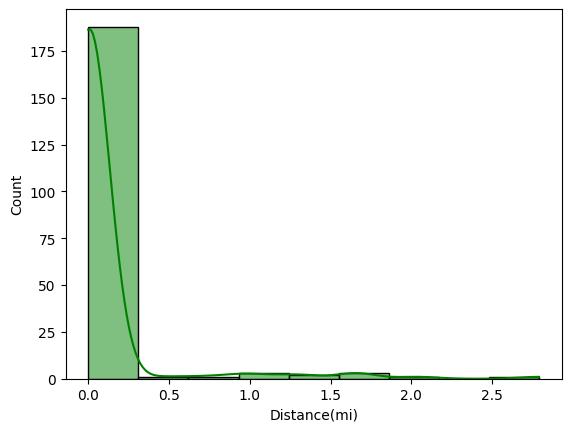

In [ ]:
sns.histplot(data=df["Distance(mi)"][: 200], kde=True,color="green")
plt.show()

In [ ]:
df.Start_Lat


0        39.865147
1        39.928059
2        39.063148
3        39.747753
4        39.627781
           ...    
57605    33.747818
57606    34.172691
57607    34.247803
57608    34.024033
57609    34.368557
Name: Start_Lat, Length: 57610, dtype: float64

In [ ]:
df.Start_Lng

0        -84.058723
1        -82.831184
2        -84.032608
3        -84.205582
4        -84.188354
            ...    
57605   -116.900307
57606   -118.554581
57607   -118.425835
57608   -117.770927
57609   -117.427757
Name: Start_Lng, Length: 57610, dtype: float64

In [ ]:
sample_data = df.sample(int(0.1 *len(df)))

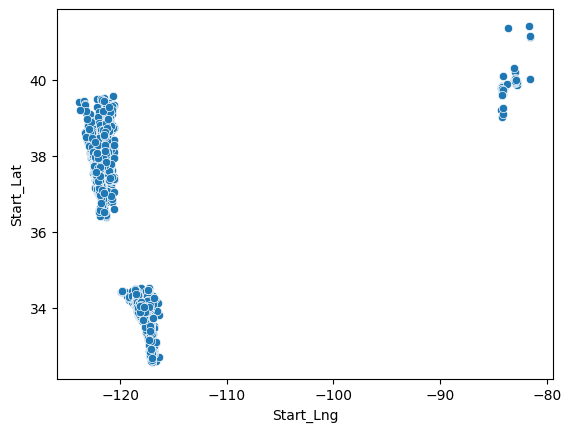

In [ ]:
sns.scatterplot(x = sample_data.Start_Lng , y = sample_data.Start_Lat )
plt.show()